In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [20]:
img=cv2.imread("bob.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

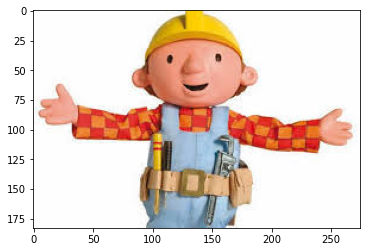

In [21]:
plt.imshow(img)
plt.show()

In [22]:
img.shape

(183, 275, 3)

In [23]:
all_pixels=img.reshape((-1,3)) 

In [24]:
all_pixels #so now this is our X we have to input in the K-means

array([[254, 254, 254],
       [254, 254, 254],
       [254, 254, 254],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

In [25]:
all_pixels.shape

(50325, 3)

In [26]:
from sklearn.cluster import KMeans

In [27]:
k=9
km=KMeans(n_clusters=k)
#so it will take color from cluster and find color 

In [28]:
km.fit(all_pixels)

KMeans(n_clusters=9)

In [29]:
km.cluster_centers_ #center we have in decimal 
#so rgb(14.91798497,  17.94468754,  13.52473915)<== are some color as these ar some dominant points

array([[253.32836154, 253.28163942, 252.93074545],
       [219.69332473, 121.59496936,  68.47242825],
       [161.62729913, 187.36915134, 209.52662149],
       [234.74956954, 169.71073273, 142.42012627],
       [ 80.2974359 ,  50.24307692,  37.39692308],
       [230.52678571, 181.59172078,  17.81818182],
       [152.88150289, 109.64812139,  68.5484104 ],
       [203.63317937,  51.12817552,  34.62047729],
       [119.86486486, 134.58708709, 143.14039039]])

In [30]:
centers=np.array(km.cluster_centers_,dtype="uint") #so changing it in integers

In [31]:
#centers==>color
centers

array([[253, 253, 252],
       [219, 121,  68],
       [161, 187, 209],
       [234, 169, 142],
       [ 80,  50,  37],
       [230, 181,  17],
       [152, 109,  68],
       [203,  51,  34],
       [119, 134, 143]], dtype=uint32)

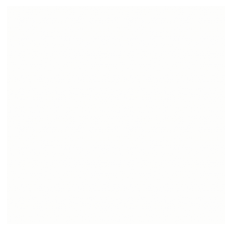

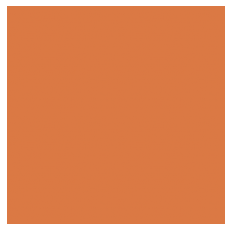

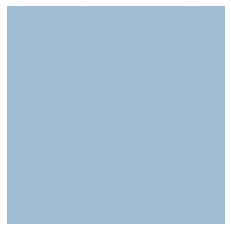

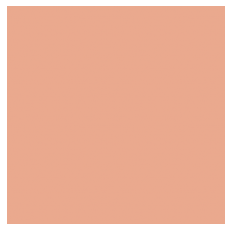

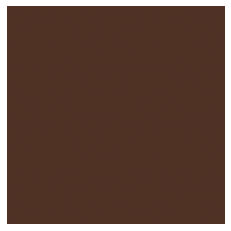

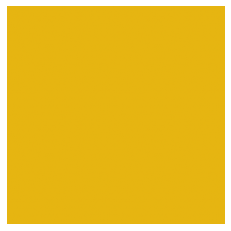

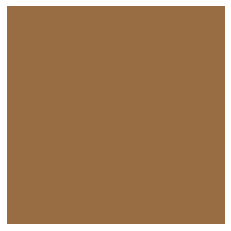

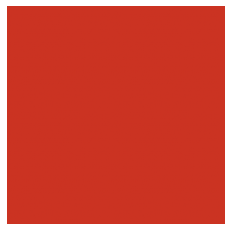

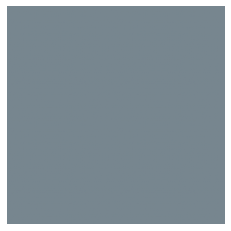

In [32]:
for c in centers:
    a=np.zeros((100,100,3)) #image 
    a[:,:,:]=c #so image will broadcast into a of the cluster center from img
    
    plt.imshow(a/255) #a should be in 0 and 1
    plt.axis("off") #removing axis 
    plt.show()

In [33]:
km.labels_#it will give cluster number associated with a cluster

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
km.labels_.shape #showing number of cluster 

(50325,)

In [35]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [36]:
new_img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint32)

In [37]:
new_img.shape
#you have same shape of image eariler of Pixels

(50325, 3)

In [38]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]
#in this we are iterating over all the points of image alloting all the color we have to new image
#colors are in center 

In [39]:
new_img


array([[253, 253, 252],
       [253, 253, 252],
       [253, 253, 252],
       ...,
       [253, 253, 252],
       [253, 253, 252],
       [253, 253, 252]], dtype=uint32)

In [40]:
new_img.shape

(50325, 3)

In [41]:
new_img = new_img.reshape((168, 300,3))


ValueError: cannot reshape array of size 150975 into shape (168,300,3)

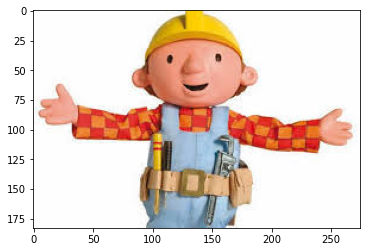

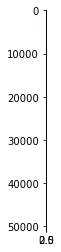

In [42]:
plt.imshow(img)
plt.show()
plt.imshow(new_img)
plt.show()

# DBSCAN 
as kmeans can only separate structured data not unstructered data

In [43]:
def plot_colors(hist, centroids):
        # initialize the bar chart representing the relative frequency
        # of each of the colors
        bar = np.zeros((50, 300, 3), dtype = "uint8")
        startX = 0
        # loop over the percentage of each cluster and the color of
        # each cluster
        for (percent, color) in zip(hist, centroids):
            # plot the relative percentage of each cluster
            endX = startX + (percent * 300)
            cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                color.astype("uint8").tolist(), -1)
            startX = endX

        # return the bar chart
        return bar